# Introduction
In this notebook it is shown how the computations for the Gamma Spectroscopy is analyized and computed.
The code is written with a .pynb extension which is a python file extension similar to .cpy & .vpy and .py.
The liberary used was prepared by the lab-supervisor.


In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy


In [2]:
sys.path.append('./lib')
import MCA, fittingFunctions, widgetsHelper
from ipywidgets import interact, interactive, fixed, widgets, Button, Layout

In [3]:
DataCobalt60Scillator = MCA.load_spectrum('Co60Scillator.Spe')

In [4]:
print(DataCobalt60Scillator)

In [5]:
print('bin edges = ', DataCobalt60Scillator.bin_edges)
print('bin centers = ', DataCobalt60Scillator.bin_centers)
print('counts = ', DataCobalt60Scillator.counts)

bin edges =  [   0    1    2 ... 2046 2047 2048]
bin centers =  [5.0000e-01 1.5000e+00 2.5000e+00 ... 2.0455e+03 2.0465e+03 2.0475e+03]
counts =  [0. 0. 0. ... 0. 0. 0.]


<IPython.core.display.Javascript object>


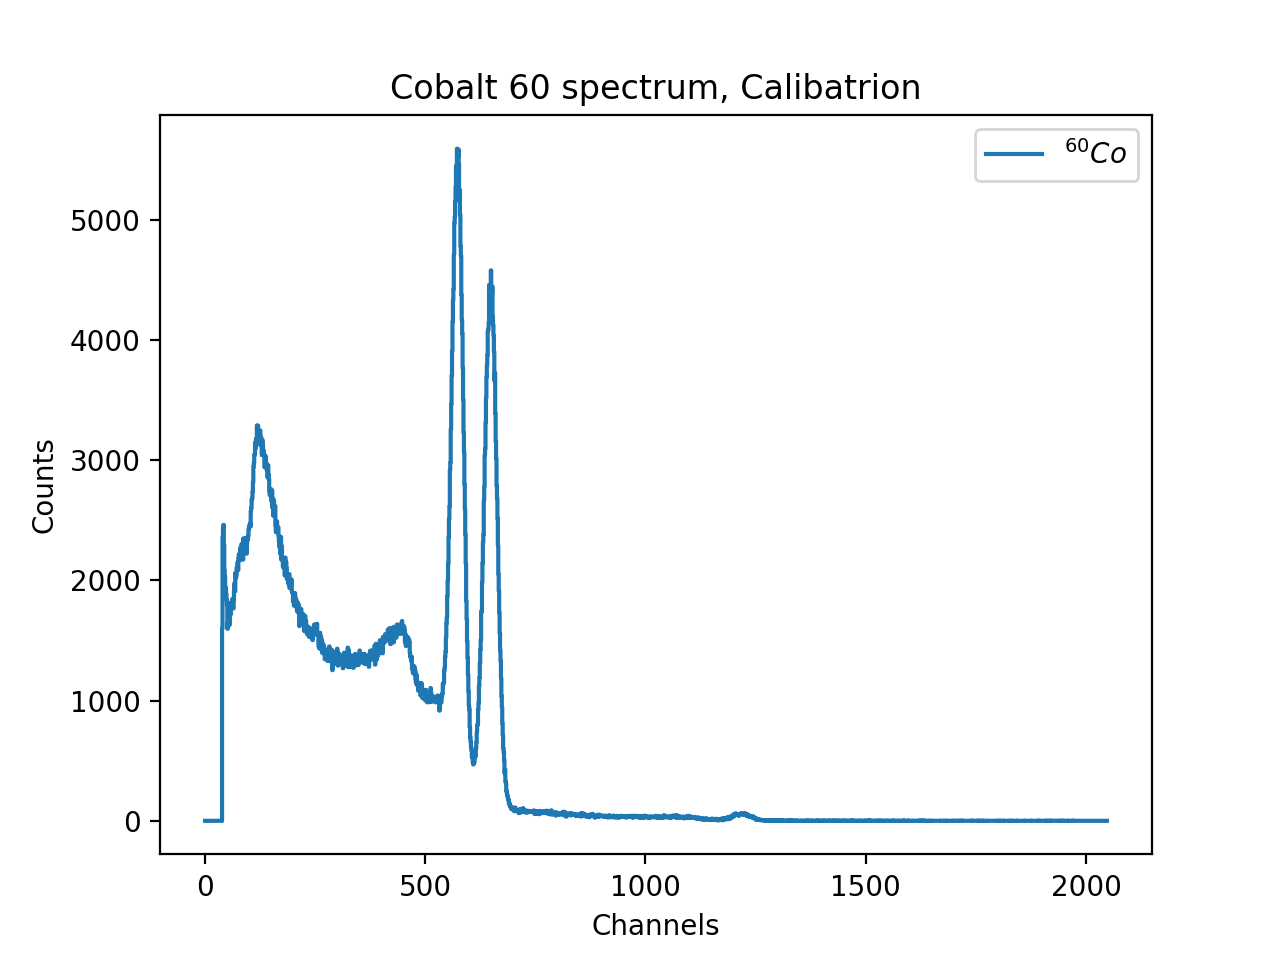

In [6]:
plt.figure()
# with the data read in with the first routine
plt.step(DataCobalt60Scillator.bin_centers, DataCobalt60Scillator.counts, where='mid', label = r'$^{60}Co$')

plt.title("Cobalt 60 spectrum, Calibatrion") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis
plt.legend()
plt.show()

In [7]:
GaussFunc = lambda x, A, mu, sigma: A*np.exp(-(x-mu)**2/(2.*sigma**2))
LineFunc = lambda k, x, m: k * x + m

In [8]:
region_start_widget = widgets.IntSlider(value=1400, min=int(DataCobalt60Scillator.bin_centers[1]), max=2000, step=1, description=r'region_start')
region_stop_widget = widgets.IntSlider(value=1600, min=10, max=2000, step=1, description=r'region_stop')
mu_widget = widgets.IntSlider(value=1500, min=1, max=2000, step=1, description=r'mu')
A_widget = widgets.IntSlider(value=2000, min=0, max=DataCobalt60Scillator.counts.max(), step=1, description=r'A')
sigma_widget = widgets.IntSlider(value=10, min=0, max=100, step=1, description=r'sigma')


def interactive_plot_manual_Gauss(region_start, region_stop, A, mu, sigma):
    widgetsHelper.plot_manual_gaussian(DataCobalt60Scillator.bin_centers, DataCobalt60Scillator.counts, region_start, region_stop, A, mu, sigma)

interactive_plot = interactive(interactive_plot_manual_Gauss, {'manual': True, 'manual_name': "Update"}, region_start=region_start_widget, region_stop=region_stop_widget, mu = mu_widget, A = A_widget, sigma= sigma_widget)
interactive_plot

interactive(children=(IntSlider(value=1400, description='region_start', max=2000, min=1), IntSlider(value=1600…

<IPython.core.display.Javascript object>


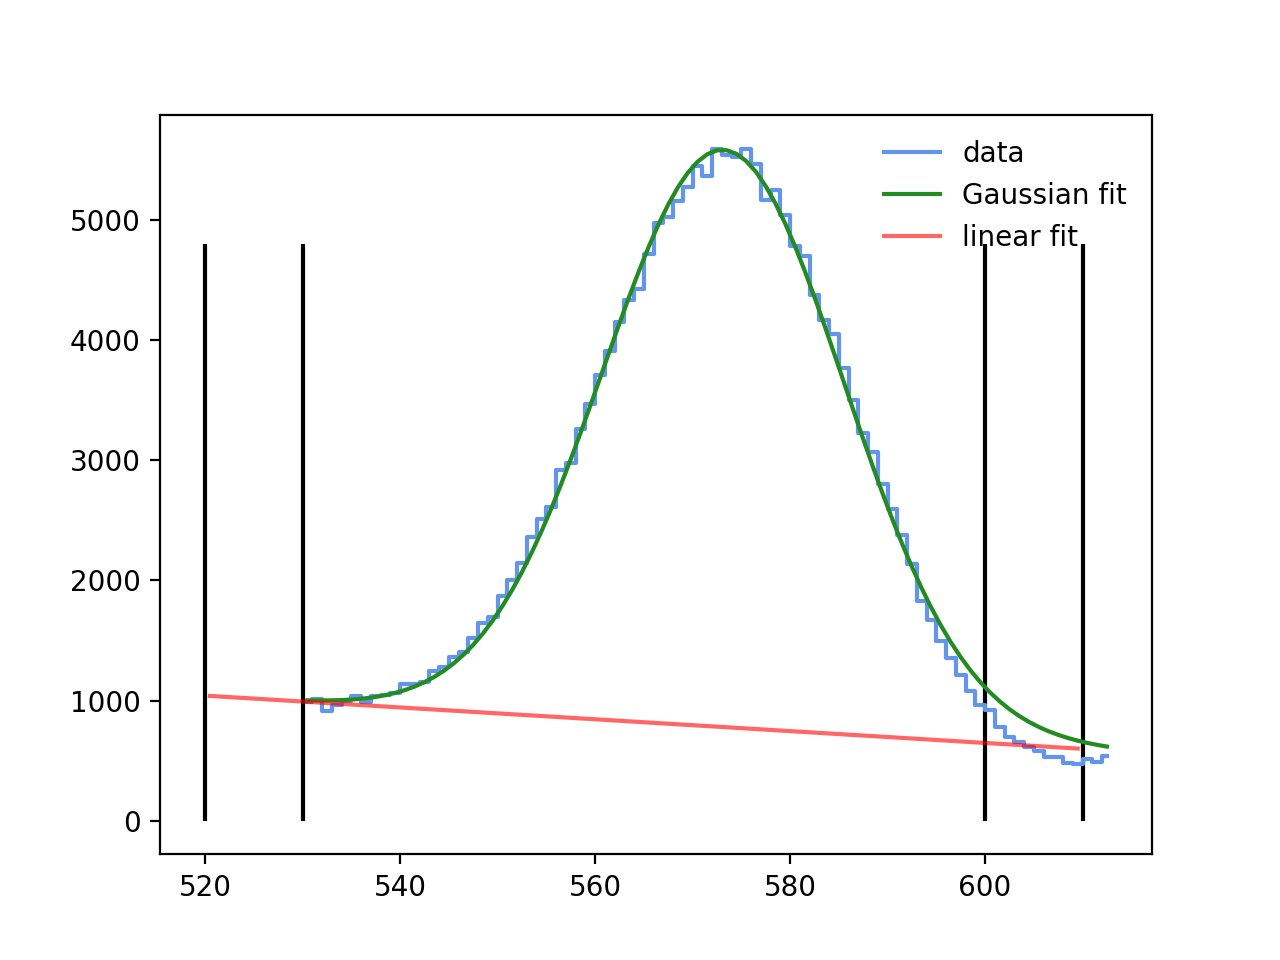

Estimated parameters:
 A = 4800.79780, mu = 573.20499,  sigma = 12.38749 

Uncertainties in the estimated parameters: 
 σ²(A) = 806.43050, σ²(mu) = 0.00716, σ²(sigma) = 0.00716 

Covariance matrix: 
 [[ 8.06430497e+02 -2.03276514e-04 -1.38790012e+00]
 [-2.03276514e-04  7.15786315e-03  1.16249102e-06]
 [-1.38790012e+00  1.16249102e-06  7.16288290e-03]]


In [9]:
peak1Cobolt60 = fittingFunctions.perform_Gaussian_fit(x=DataCobalt60Scillator.bin_centers, 
                                              y=DataCobalt60Scillator.counts,      
                                              region_start=530,   # bins where to start fitting
                                              region_stop=613,    # bins where to stop fitting
                                              mu_guess=580,       # guess for the position of peak centroid
                                              A_guess=5800,       # guess for the amplitude of the peak
                                              sigma_guess=1,
                                              left_selection = [520, 530], 
                                              right_selection = [600, 610])      # guess for the sigma
#peak1Cobolt60.print_full_info()

<IPython.core.display.Javascript object>


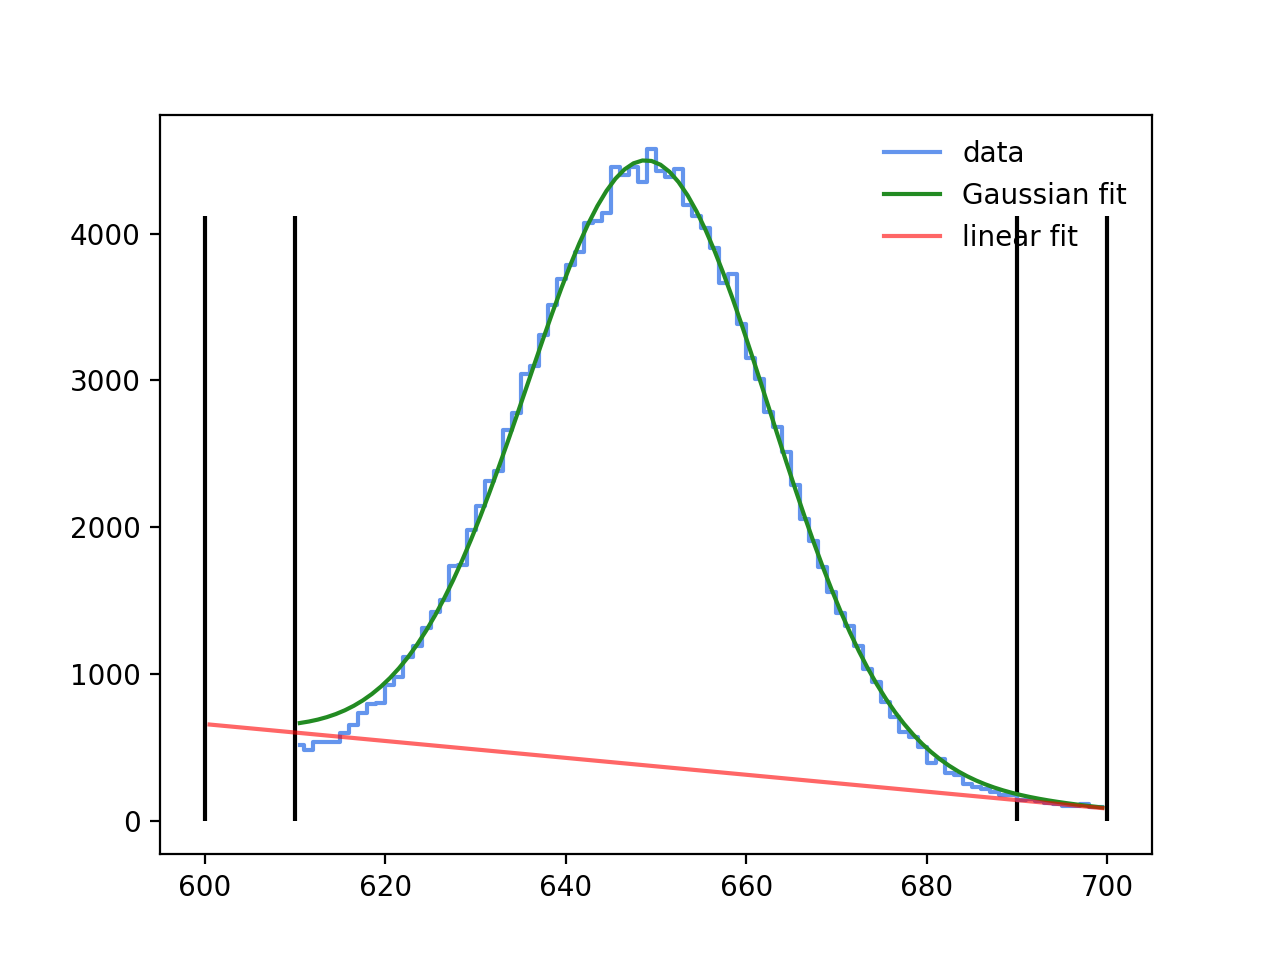

Estimated parameters:
 A = 4122.89689, mu = 649.11455,  sigma = 13.47116 

Uncertainties in the estimated parameters: 
 σ²(A) = 319.53099, σ²(mu) = 0.00455, σ²(sigma) = 0.00456 

Covariance matrix: 
 [[ 3.19530993e+02  6.74420490e-04 -6.97428544e-01]
 [ 6.74420490e-04  4.54624259e-03 -4.96099567e-06]
 [-6.97428544e-01 -4.96099567e-06  4.55918898e-03]]


In [10]:
peak2Cobolt60 = fittingFunctions.perform_Gaussian_fit(x=DataCobalt60Scillator.bin_centers, 
                                              y=DataCobalt60Scillator.counts,      
                                              region_start=610,   # bins where to start fitting
                                              region_stop=700,    # bins where to stop fitting
                                              mu_guess=650,       # guess for the position of peak centroid
                                              A_guess=5800,       # guess for the amplitude of the peak
                                              sigma_guess=1,
                                              left_selection = [600, 610], 
                                              right_selection = [690, 700])      # guess for the sigma
#peak1Cobolt60.print_full_info()

In [11]:
Area1Cobalt60 = np.sqrt(2*np.pi)*peak1Cobolt60.A*np.abs(peak1Cobolt60.sigma)
print('Area of the first peak is {:.2f}'.format(Area1Cobalt60))
Area2Cobalt60 = np.sqrt(2*np.pi)*peak2Cobolt60.A*np.abs(peak2Cobolt60.sigma)
print('Area of the second peak is {:.2f}'.format(Area2Cobalt60))

Area of the first peak is 149068.83
Area of the second peak is 139218.65
